## Stock Market Analysis

### Data Preparation

In [1]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as stm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Load stock data into dataframe and check shape
file_name = 'stock.csv'
df = pd.read_csv(file_name)
df.shape

(483, 7)

In [6]:
# View a few rows in dataframe
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...


In [7]:
# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Ensure the data is sorted by date
df = df.sort_values(by='Date')

In [9]:
# Create column Trend in df and label Trend as Bullish or Bearish
df["Trend"] = df['NASDAQ'].diff().apply(lambda x: 'Bullish' if x > 0 else 'Bearish')

In [10]:
# Assume Bullish for the first date in the dataset
df['Trend'].iloc[0] = "Bullish"

<ipython-input-10-d34182daed8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trend'].iloc[0] = "Bullish"


In [11]:
# Confirm updates
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish


In [12]:
# Define a function to analyze sentiment and to obtain compound sentiment scores
def get_compound_score(headline):
    return stm().polarity_scores(headline)['compound']

In [13]:
# Store compound sentiment scores in StmScore
df['StmScore'] = df['Headline'].apply(get_compound_score)

In [14]:
# Confirm update
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065


In [15]:
# Define a function to categorize sentiment scores
def categorize_sentiment(compound):
    if compound > 0.7:
        return 'positive'
    elif compound < -0.7:
        return 'negative'
    else:
        return 'neutral'


In [16]:
# Store categorized labels in Sentiment
df['Sentiment'] = df['StmScore'].apply(categorize_sentiment)

In [17]:
# Confirm update
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.9800,negative
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.9760,negative
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.5330,neutral
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,neutral


### Linear Regression Analysis

In [18]:
# Prepare the features x
x = df[["StmScore"]]

In [20]:
# Prepare the target y
y = df['AAPL']

In [22]:
# Split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)

In [23]:
# Confirm values for training set
x_train

,StmScore
269,0.9936
479,-0.9522
327,0.9886
220,0.9976
134,0.9976
...,...
23,-0.7691
271,-0.9756
386,0.9634
325,-0.9836


In [24]:
# Initialize the Linear Regression model
model = LinearRegression()

In [25]:
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# Confirm values for test set
x_test

,StmScore
296,0.9912
112,-0.9783
317,-0.9924
341,0.9754
233,-0.9894
...,...
343,-0.9987
87,0.9959
354,-0.9951
150,0.9585


In [27]:
# Make predictions on the test set
y_predict = model.predict(x_test)

In [28]:
# Confirm predictions
print(y_predict)

[49.30626123 54.76686467 54.8059581  49.35006806 54.79764035 49.79340418
 49.33065997 49.30127058 49.3597721  49.77954126 54.60245046 54.79348147
 54.62601742 49.31042011 54.80789891 49.29101202 49.29378461 49.47483432
 49.30099333 49.56910216 54.81150326 54.75660611 54.82176182 49.29766623
 54.74995191 54.82425715 49.53749471 54.03490259 49.36115839 54.79514502
 52.64805627 49.76817367 49.28713041 49.31956964 49.66364726 49.32483755
 52.69685374 54.78738179 51.29919434 54.73941609 50.30855021 49.30598398
 49.29295283 54.82370263 54.81871198 49.29905252 54.82564344 49.29544816
 54.78544098 54.76242853 49.28823944 54.79070889 54.46215773 54.80069019
 49.30459768 54.76048773 54.50707358 49.414392   54.79486776 54.81954376
 49.30376591 50.14274971 49.41411474 49.4956287  49.5654978  49.28463508
 54.71695816 50.20069671 53.93980297 49.61900867 49.31236092 49.32067867
 54.8192665  49.4576443  54.77157806 54.34820454 49.31651979 53.37613673
 54.79070889 49.35894032 54.7846092  49.29544816 54

In [29]:
print(y_test)

296    42.110863
112    45.651524
317    47.412918
341    46.126564
233    41.288761
         ...    
343    45.662693
87     38.480377
354    43.401314
150    45.449238
453    79.486931
Name: AAPL, Length: 97, dtype: float64


### Evaluate the Model

In [30]:
# Calculate R-squared score
r2 = r2_score(y_test, y_predict)
print(f"R^2 Score (r2_score): {r2}")

R^2 Score (r2_score): -0.02426185250869084


In [31]:
#Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 271.0444113535285


### Interpreting Results and Summarize Findings:

After analyzing the relationship between AAPL stock prices and the sentiment scores with a linear regression model, I determined that the model's predictions may indicate that the sentiment scores do not predict APPL prices. My evaluation included calculating R-squared and MSE, which resulted in an R-squared value of (-0.024) and an MSE of (271.04.).

My determination is because the R-squared result is negative, which indicates that the model does not fit the data well. In addition, the MSE of (271.04), which should be closer to 0, is a bit high and indicates that this model needs more work.

### Logistic Regression for Trend Prediction

In [32]:
# Encode Trend column to binary values
df['Trend'] = df['Trend'].map({'Bullish': 1, 'Bearish': 0})

In [33]:
# Prepare the features x
x = df[["StmScore"]]

In [34]:
# Prepare target y
y = df["Trend"]

In [35]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)

In [36]:
# Initialize and train the model

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
# Confirm values for x_test
x_test

,StmScore
296,0.9912
112,-0.9783
317,-0.9924
341,0.9754
233,-0.9894
...,...
343,-0.9987
87,0.9959
354,-0.9951
150,0.9585


In [38]:
# Make prediction on test set and print
y_predict= model.predict(x_test)
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Evaluate the Model

In [39]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5979381443298969


In [40]:
# Evaluate the model using the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print(f"Confusion Matrix:{conf_matrix}")


Confusion Matrix:[[ 0 39]
 [ 0 58]]


In [41]:
# Evaluate the model using classification report
report = classification_report(y_test, y_predict)
print(f"Classification Report:{report}")

Classification Report:              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.60      1.00      0.75        58

    accuracy                           0.60        97
   macro avg       0.30      0.50      0.37        97
weighted avg       0.36      0.60      0.45        97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpreting Results and Summarize Findings

After analyzing the relationship between trend and sentiment scores with a logistic regression model, I determined that the model's predictions are correct 59% of the time. However, it may not be useful because it does not predict any positive cases. My evaluation of the model included calculating the accuracy score and using results from the confusion matrix and classification report.

The result for the accuracy score indicates that the model's predictions were correct 59% of the time, which in some cases may suggest that the model's accuracy is poor and, in other cases, that it might be good. As for the confusion matrix, the result of true positives (0), false positives (0), false negatives (39), and true negatives (58) indicates that there may be an issue with the model since it does not predict any positive cases.

The classification report confirms the results from the confusion matrix, showing that the precision is (0) because the model has no true positive or false positive predictions, and the recall is (0). This indicates that the model does not identify any actual positives, and the F1 Score is undefined because precision and recall are both 0.

### Computing Summary Statistics

In [42]:
# Select columns
selected_columns = ['AAPL', 'NASDAQ', 'NYA', 'SP500', 'DJI', 'StmScore']

# Compute summary statistics
summary_stats = df[selected_columns].agg(['mean', 'median', 'std']).transpose()

# Display the summary statistics
print(summary_stats)

                  mean        median          std
AAPL         52.481323     45.651524    14.975848
NASDAQ     7868.327406   7628.279785   900.399860
NYA       12464.099698  12622.099610   838.996522
SP500      2819.119480   2786.570068   198.403574
DJI       25261.111627  25283.000000  1547.373767
StmScore      0.065752      0.634900     0.926900


In [43]:
# Use Z-score method to identify outliers
def z_score_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return (z_scores > threshold).any(axis=1)

# Identify outliers using both methods
outliers_z = z_score_outliers(df[selected_columns])

In [44]:
# Display outliers
print("Outliers identified using Z-score method:")
print(df[outliers_z])

Outliers identified using Z-score method:
          Date       AAPL        NASDAQ           NYA        SP500  \
402 2020-03-16  59.056839   6904.589844   9567.530273  2386.129883   
404 2020-03-18  60.144295   6989.839844   9384.599609  2398.100098   
405 2020-03-19  59.683464   7150.580078   9461.299805  2409.389893   
406 2020-03-20  55.894428   6879.520020   9133.160156  2304.919922   
407 2020-03-23  54.707001   6860.669922   8777.379883  2237.399902   
408 2020-03-24  60.195492   7417.859863   9658.320313  2447.330078   
414 2020-04-01  58.739861   7360.580078   9844.849609  2470.500000   
416 2020-04-03  58.861763   7373.080078   9880.629883  2488.649902   
477 2020-07-10  93.803986  10617.440430  12075.599610  3185.040039   

             DJI                                           Headline  Trend  \
402  20188.50000  With 1.5 million coronavirus tests in stock, T...      0   
404  19898.90039  "There's actually a return to normalcy and so ...      0   
405  20087.19922  "In l

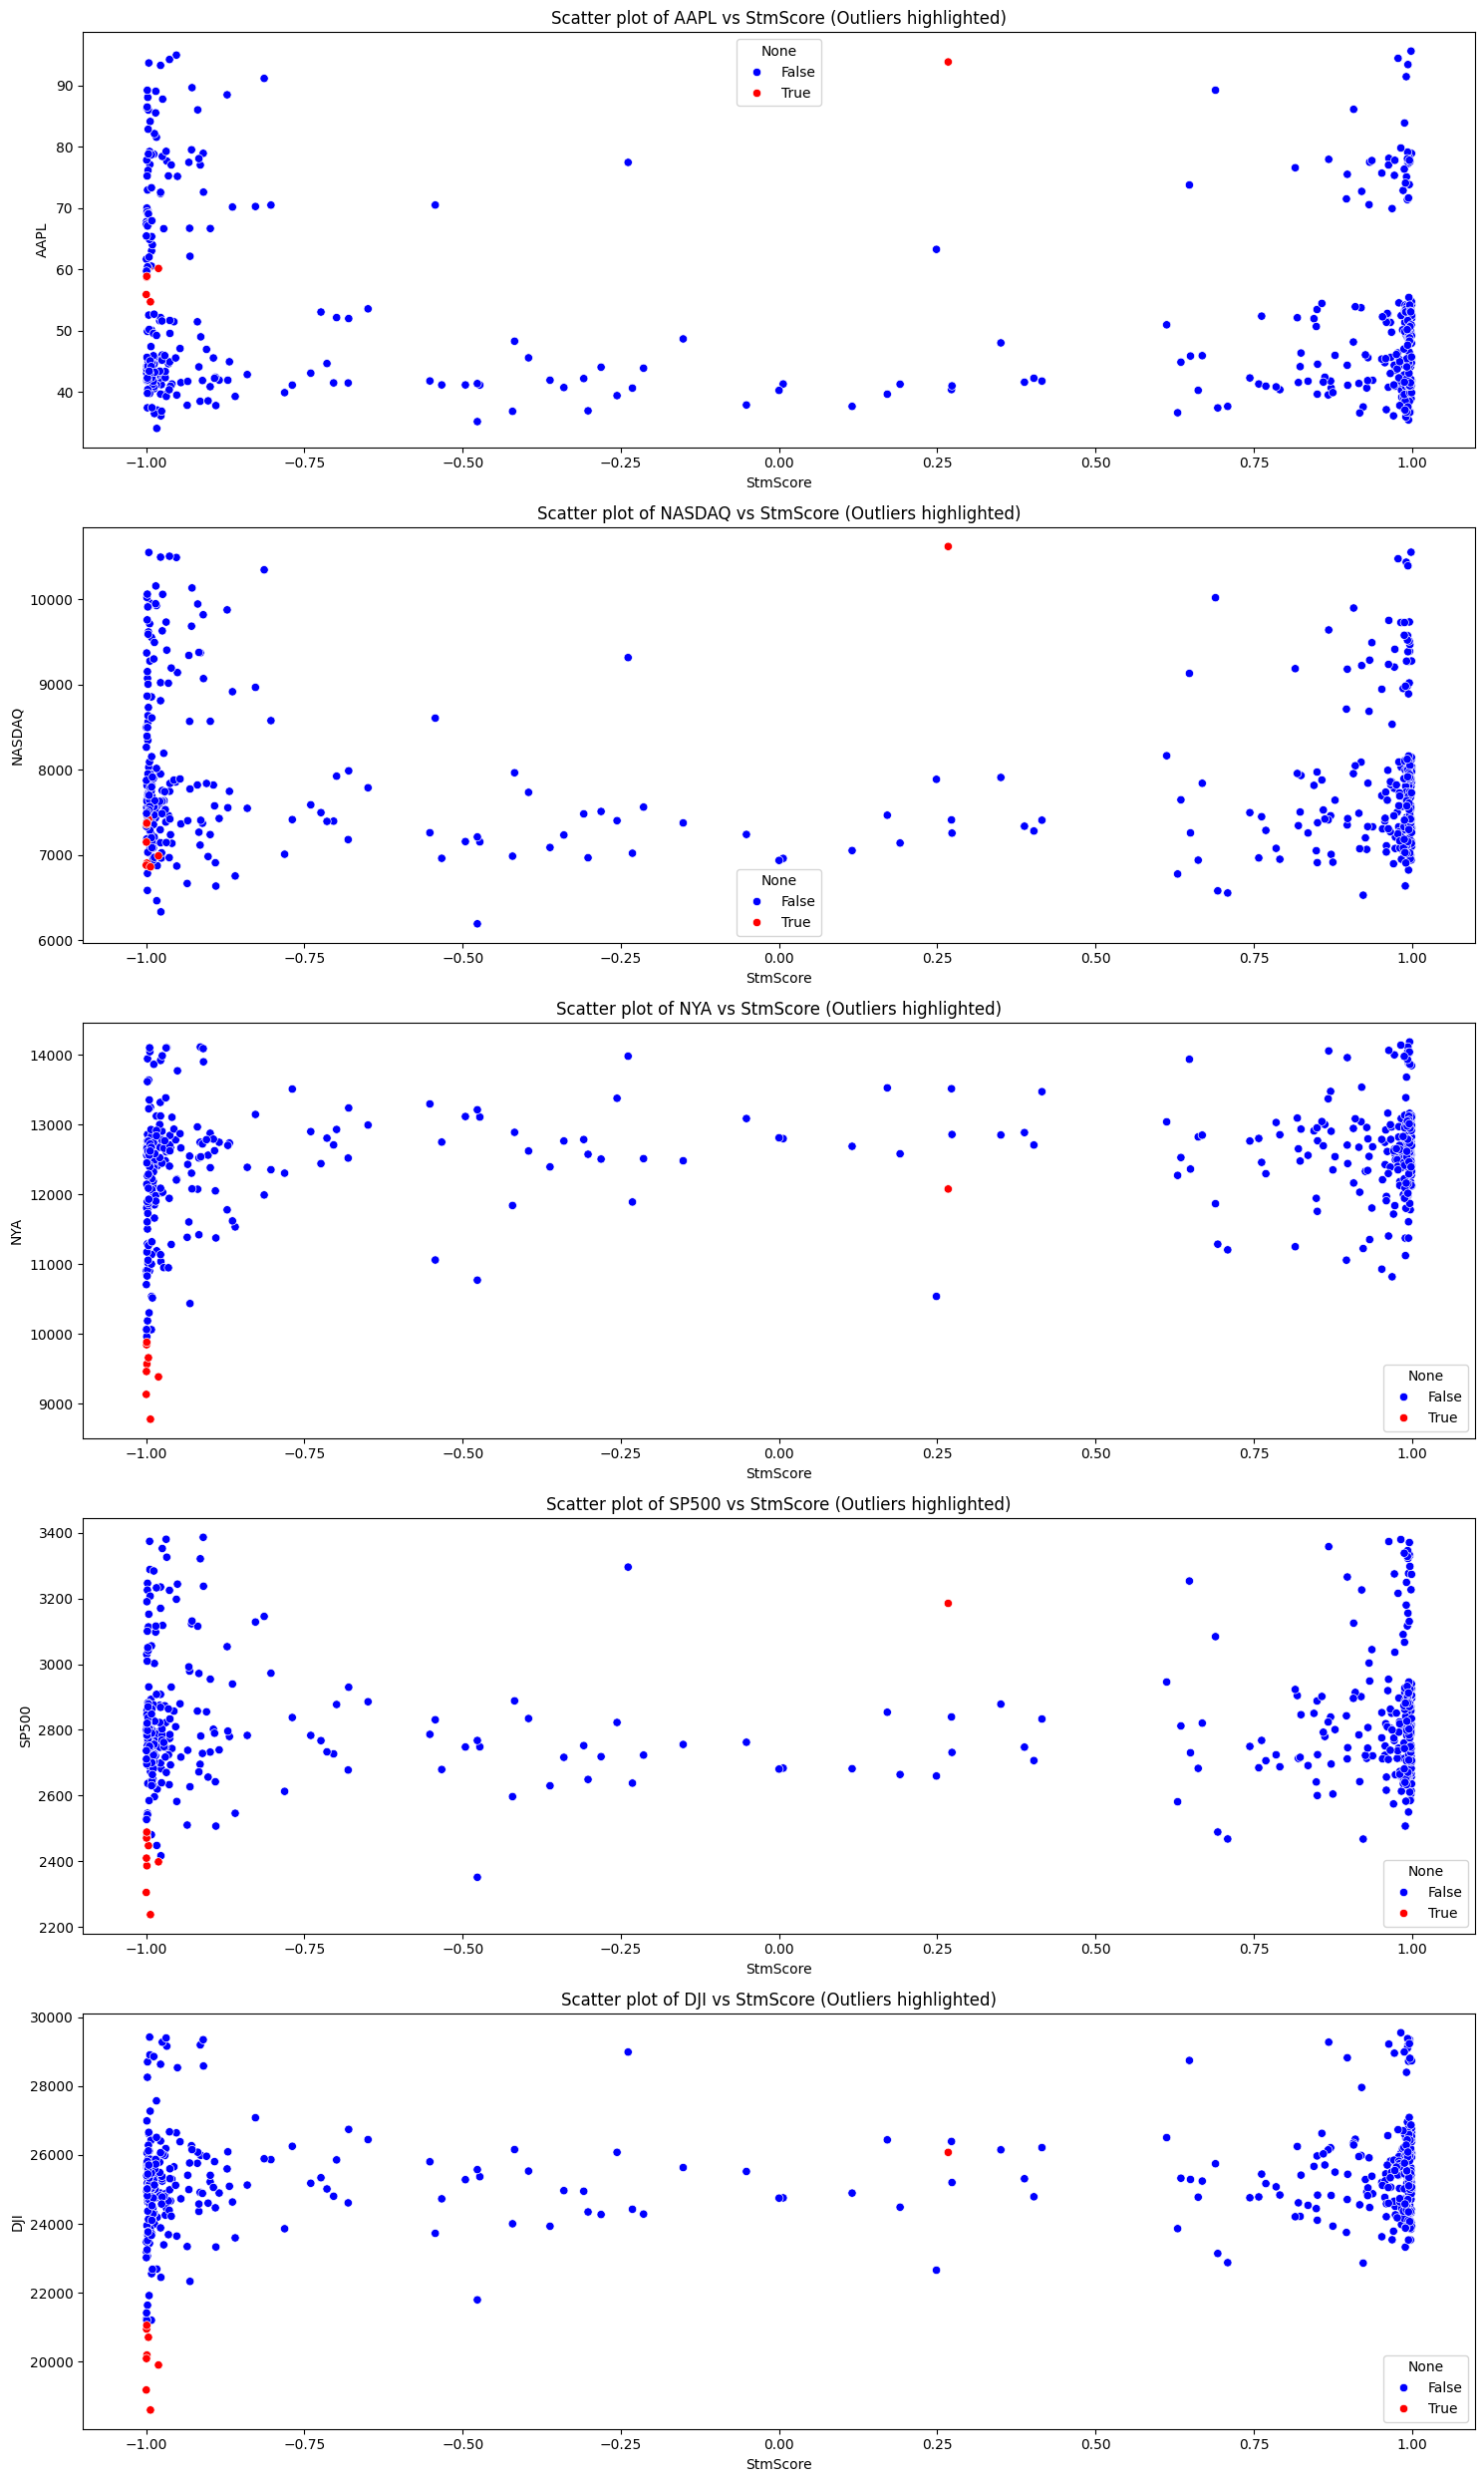

In [60]:
# Define pairs of columns to plot
pairs_to_plot = [
    ('StmScore', 'AAPL'),
    ('StmScore', 'NASDAQ'),
    ('StmScore', 'NYA'),
    ('StmScore', 'SP500'),
    ('StmScore', 'DJI')
]

# Plot scatter plots with outliers highlighted using enumerate
plt.figure(figsize=(15, 25))
for i, (x_col, y_col) in enumerate(pairs_to_plot, 1):
    plt.subplot(len(pairs_to_plot), 1, i)
    sns.scatterplot(x=x_col, y=y_col, data=df, hue=outliers_z, palette={True: 'red', False: 'blue'})
    plt.title(f'Scatter plot of {y_col} vs {x_col} (Outliers highlighted)')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()

### Observations of outliers or anomalies:

After using the Z-score method to identify outliers or anomalies and plotting the data versus the outliers for the key columns, most outliers are associated with sentiment scores of around -0.98 to -0.99.

This observation indicates that on the high end of negative sentiment scores, there may be some unusual circumstances or behavior in the stock indices.

### Distribution Analysis

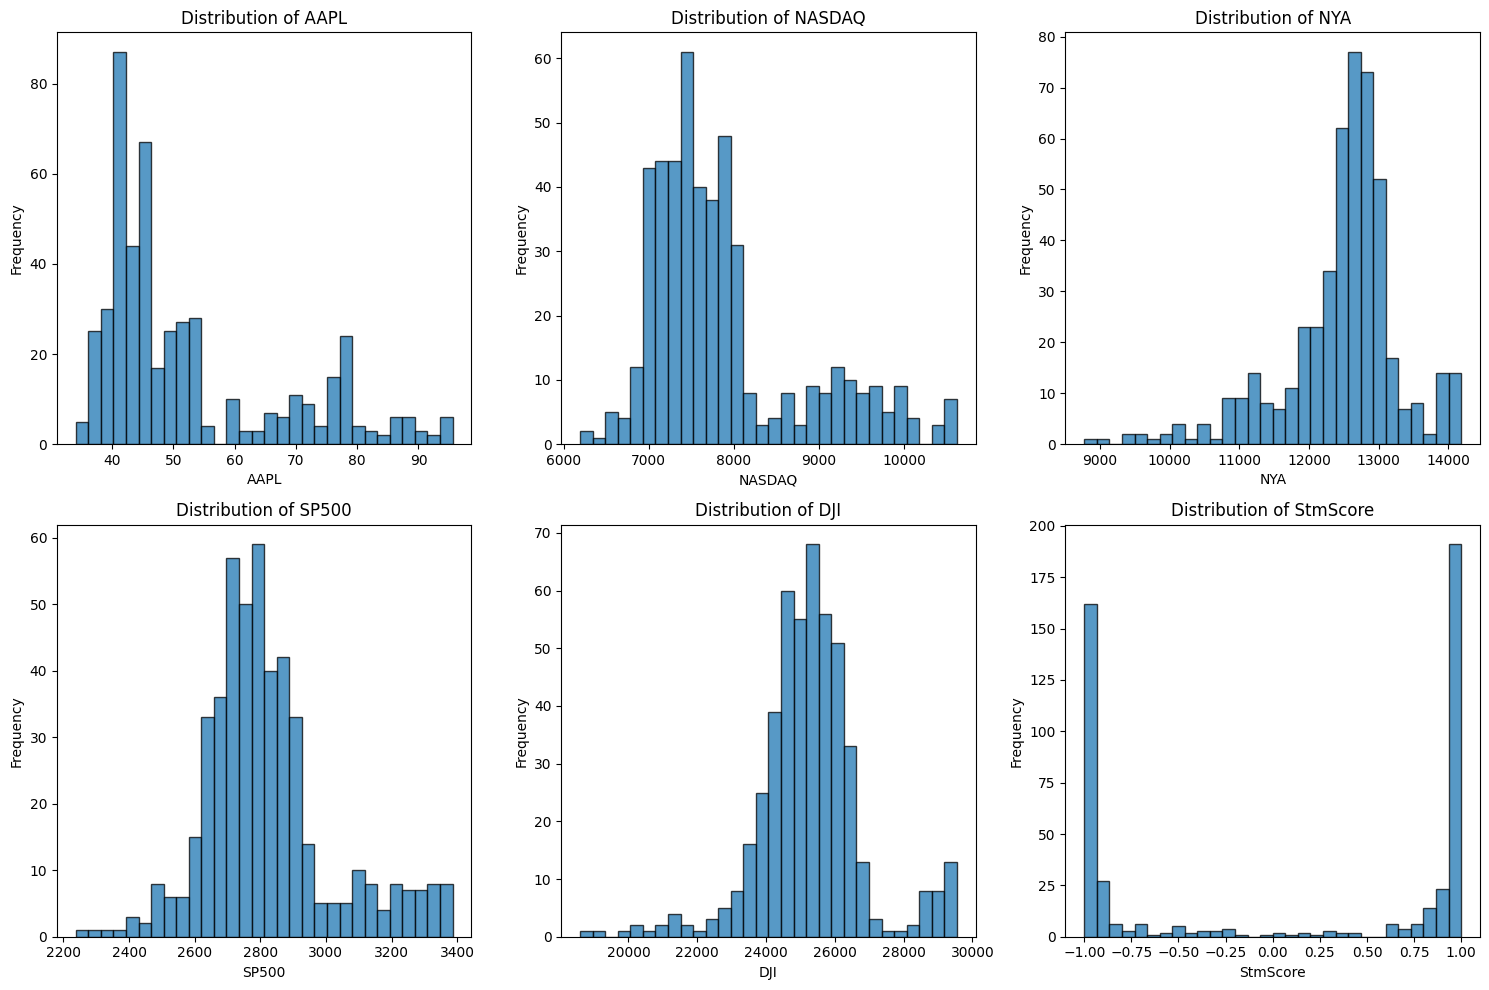

In [46]:
# Create histograms for the distributions of stock indices and sentiment scores
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column].dropna(), bins=30, alpha=0.75, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
# check skewness
summary_stats = df[selected_columns].agg(['skew'])
print(summary_stats)

          AAPL    NASDAQ       NYA     SP500       DJI  StmScore
skew  1.189386  1.215745 -1.111127  0.835184 -0.084394 -0.131115


### Distribution observations:

After creating histograms for the distributions of stock indices and sentiment scores and calculating the skewness, I observed the following about the distributions. For APPL, NASDAQ, and SP500, I observed that they have a positive skewness, indicating a right skew with most of the data points on the left and a tail extending to the right. As for NYA, DJI, and StmScore, I observed a negative skewness, indicating a left skew with most of the data points on the right and a tail extending to the left.

- Correlation Analysis:
    - Calculate and visualize correlations among stock indices and sentiment scores.
    - Use correlation matrices for visualization.
    - Markdown Summary: Discuss correlation findings.

In [47]:
# Calculate the correlation among stock indices and sentiment scores
correlation_matrix = df[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

              AAPL    NASDAQ       NYA     SP500       DJI  StmScore
AAPL      1.000000  0.941846 -0.085380  0.751729  0.344752 -0.163202
NASDAQ    0.941846  1.000000  0.151450  0.887213  0.546378 -0.093781
NYA      -0.085380  0.151450  1.000000  0.562041  0.863321  0.260141
SP500     0.751729  0.887213  0.562041  1.000000  0.861979  0.031803
DJI       0.344752  0.546378  0.863321  0.861979  1.000000  0.187811
StmScore -0.163202 -0.093781  0.260141  0.031803  0.187811  1.000000


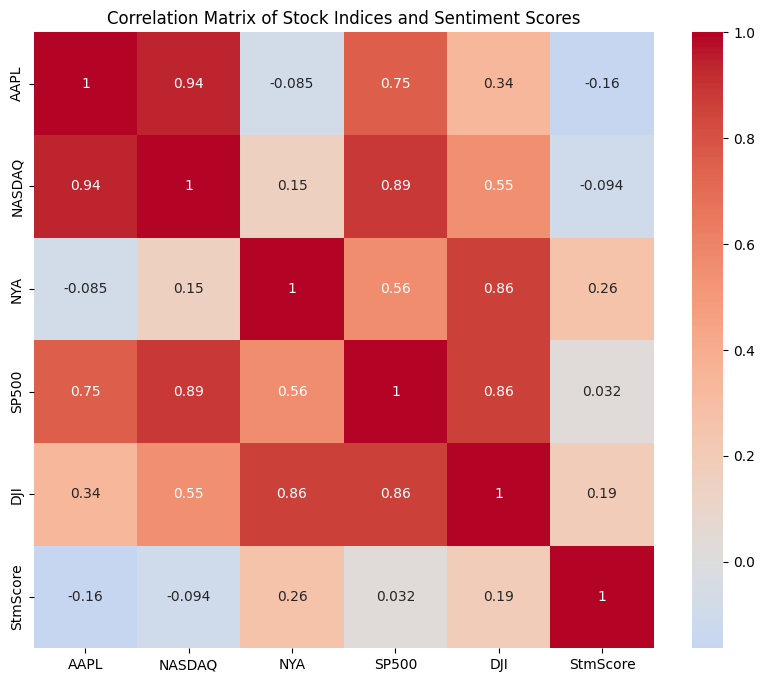

In [48]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Stock Indices and Sentiment Scores')
plt.show()

### Correlation Findings:

After calculating and visualizing correlations amongst stock indices and sentiment scores, I determined the following about the different variables.

APL shows strong positive correlations with NASDAQ (0.94) and SP500 (0.75), and a moderate positive correlation with DJI (0.34). However, there are no meaningful correlations with NYA (-0.085) and StmScore (-0.16).

NASDAQ has a strong positive correlation with AAPL (0.94) and SP500 (0.89). The correlation with DJI (0.55) is moderately positive. The correlation is weakly positive with NYA (0.15), and there is no meaningful correlation with StmScore (-0.094).

NYA has a strong positive correlation with DJI (0.86). The correlation with SP500 (0.56) is moderately positive. The correlations with NASDAQ (0.15) and StmScore (0.26) are weakly positive, and with AAPL (-0.085), there is no meaningful correlation.

SP500 has a strong positive correlation with NASDAQ (0.89), DJI (0.86), and AAPL (0.75). With NYA (0.56), SP500 has a moderate positive correlation, and with StmScore (0.032), there is a weak positive correlation.

DJI has a strong positive correlation with NYA and SP500 (0.86). The correlations with NASDAQ (0.55) and AAPL (0.34) are moderately positive, and with StmScore (0.19), there is a weak positive correlation.

StmScore has a moderate positive correlation with the SP500 (0.32). There are weak positive correlations with NYA (0.26) and DJI (0.19). There are no meaningful correlations with AAPL (-0.16) and NASDAQ (-0.094).

- Trend Analysis:
    - Plot time series graphs for stock trends and sentiment scores.
    - Highlight patterns or shifts using preattentive atributes.
    - Markdown Summary: Explain trend analysis observations.

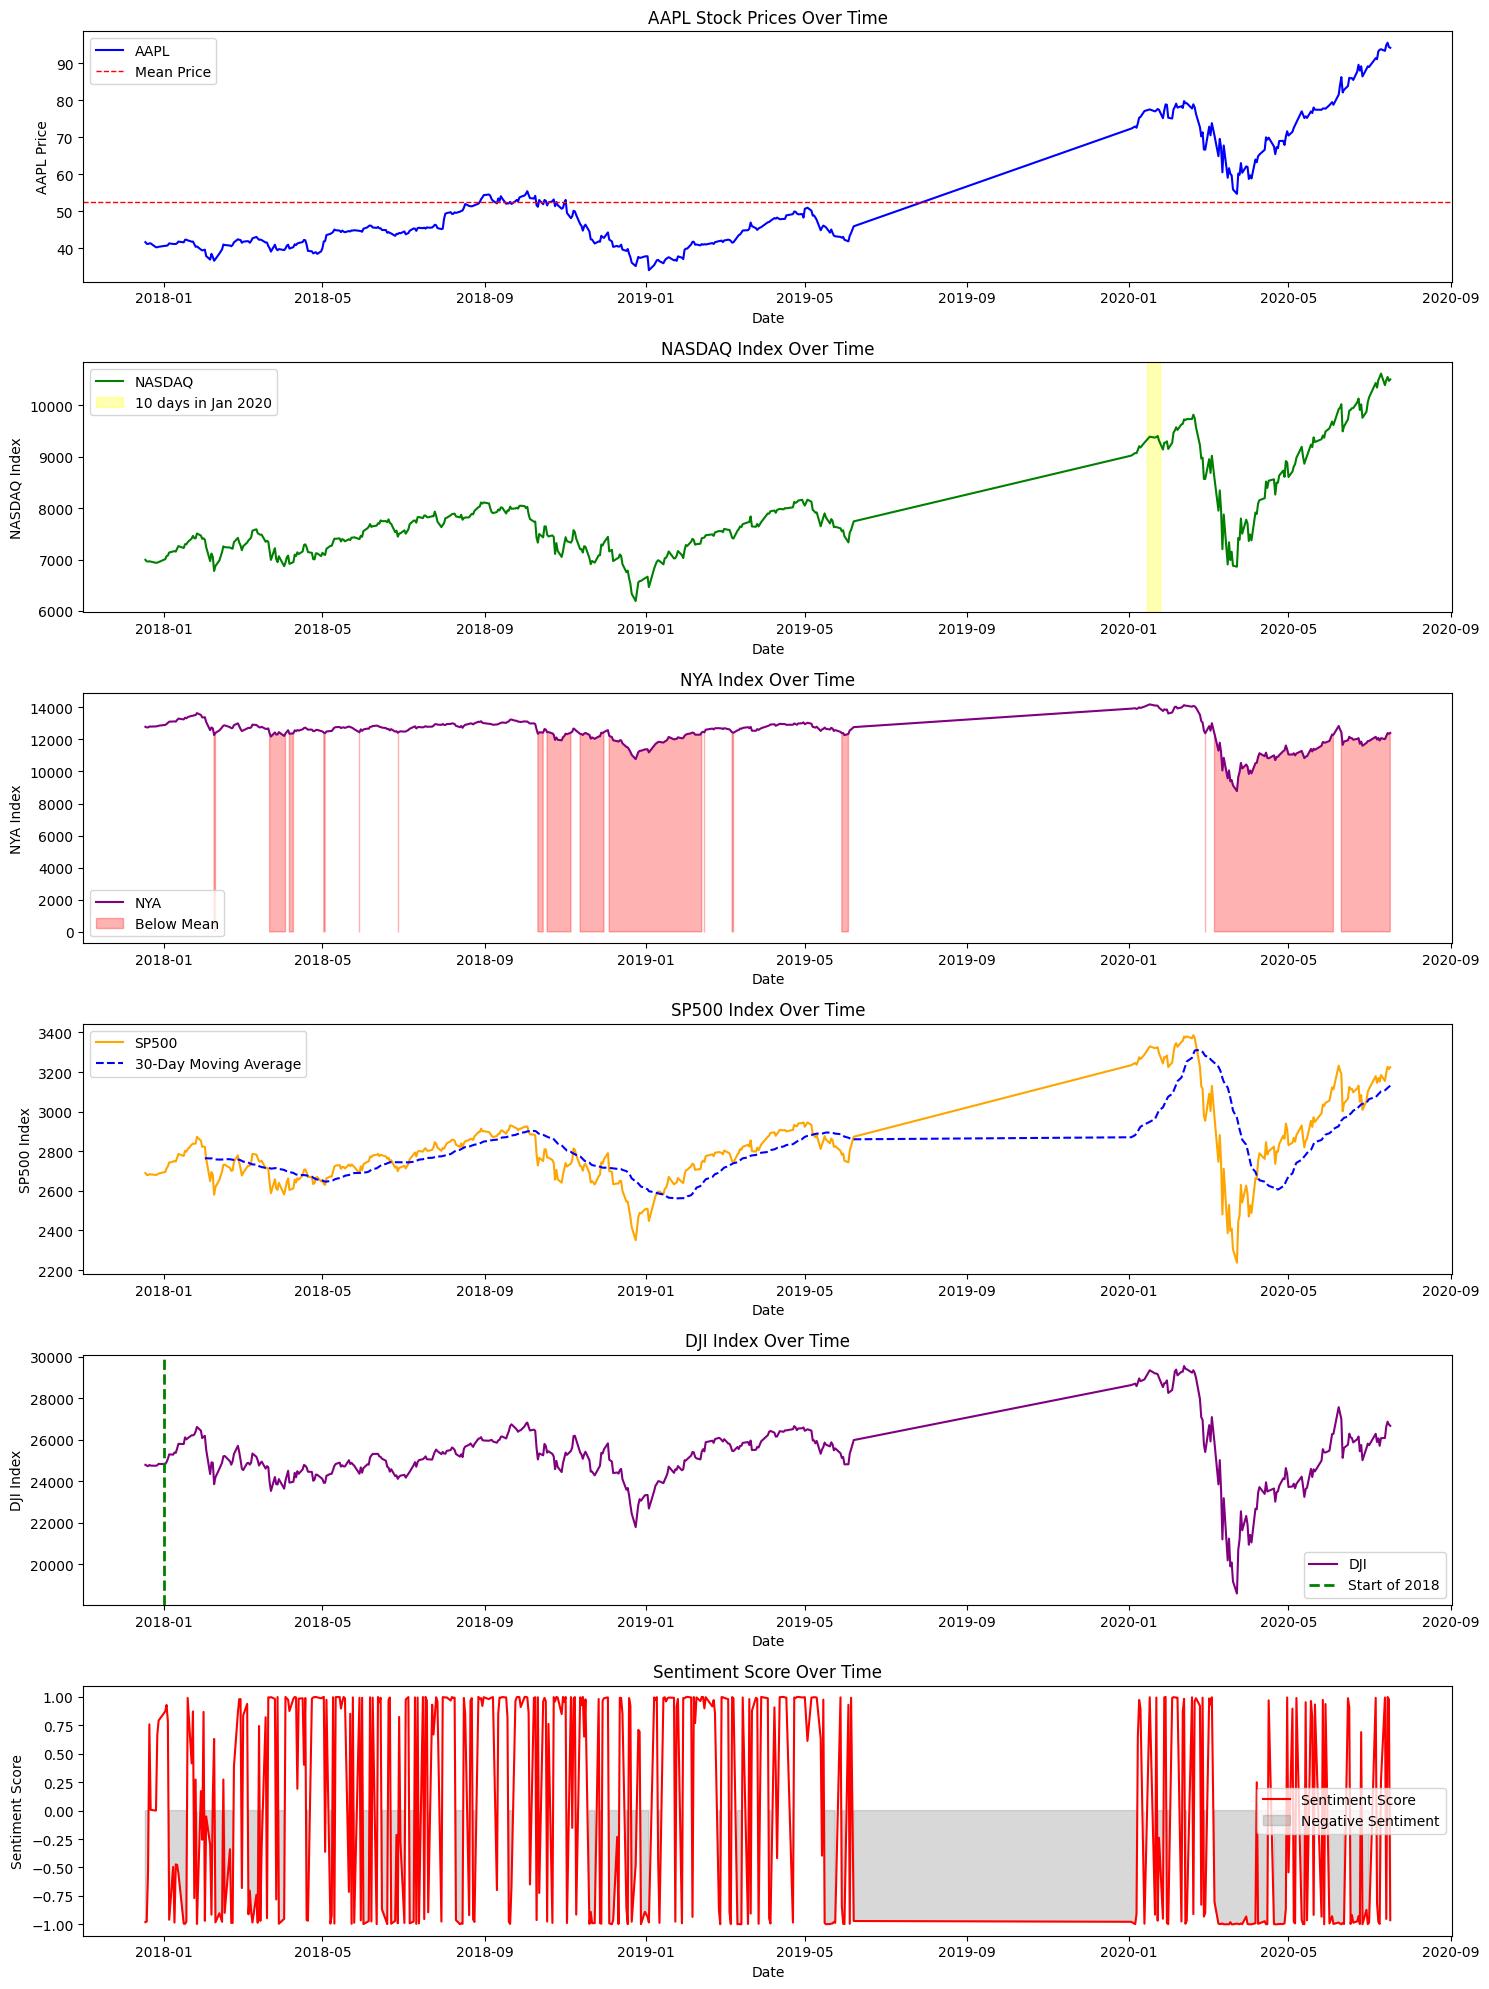

In [74]:
# Ensure specific dates are in datetime format
highlight_start_date = pd.to_datetime('2020-01-15')
highlight_end_date = pd.to_datetime('2020-01-25')
start_of_2018 = pd.to_datetime('2018-01-01')

# Set up the figure
plt.figure(figsize=(15, 20))

# Plot AAPL stock prices highlighting the mean
plt.subplot(6, 1, 1)
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.axhline(df['AAPL'].mean(), color='red', linestyle='--', linewidth=1, label='Mean Price')
plt.title('AAPL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('AAPL Price')
plt.legend()

# Plot NASDAQ index highlighting a spefic period
plt.subplot(6, 1, 2)
plt.plot(df['Date'], df['NASDAQ'], label='NASDAQ', color='green')
plt.axvspan(highlight_start_date, highlight_end_date, color='yellow', alpha=0.3, label='10 days in Jan 2020')
plt.title('NASDAQ Index Over Time')
plt.xlabel('Date')
plt.ylabel('NASDAQ Index')
plt.legend()

# Plot NYA index highlighting below the mean
plt.subplot(6, 1, 3)
plt.plot(df['Date'], df['NYA'], label='NYA', color='purple')
plt.fill_between(df['Date'], df['NYA'], where=(df['NYA'] < df['NYA'].mean()), color='red', alpha=0.3, label='Below Mean')
plt.title('NYA Index Over Time')
plt.xlabel('Date')
plt.ylabel('NYA Index')
plt.legend()

# Plot SP500 index highlighting 30 day moving average
plt.subplot(6, 1, 4)
plt.plot(df['Date'], df['SP500'], label='SP500', color='orange')
plt.plot(df['Date'], df['SP500'].rolling(window=30).mean(), color='blue', linestyle='--', label='30-Day Moving Average')
plt.title('SP500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('SP500 Index')
plt.legend()

# Plot DJI index highlighting the start of 2018
plt.subplot(6, 1, 5)
plt.plot(df['Date'], df['DJI'], label='DJI', color='purple')
plt.axvline(start_of_2018, color='green', linestyle='--', linewidth=2, label='Start of 2018')
plt.title('DJI Index Over Time')
plt.xlabel('Date')
plt.ylabel('DJI Index')
plt.legend()

# Plot Sentiment Score highlighting negative sentiments
plt.subplot(6, 1, 6)
plt.plot(df['Date'], df['StmScore'], label='Sentiment Score', color='red')
plt.fill_between(df['Date'], df['StmScore'], where=(df['StmScore'] < 0), color='gray', alpha=0.3, label='Negative Sentiment')
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()
plt.show()

### Explain Trend Analysis Observations:

After plotting time series graphs for stock trends and sentiment scores and highlighting the patterns or shifts using preattentive attributes, I observed the following.

In the AAPL plot, I highlighted the mean price, which gave me an excellent indication of how the price increased and decreased over time. In addition, I observed how the price doubled toward the end of 2020.

The following stock indices I plotted was NASDAQ, in which I plotted ten days in January 2020 to see any significant differences. During the ten days, the price stayed leveled, showing me that prices may remain the same within ten days.

Third, I plotted NYA, highlighting any prices below the mean. The trend I noticed for this plot was the exact periods when the price was below the mean. For instance, there was a brief period in early 2018, another toward the end of 2018 until early 2019, and a few months in the middle of 2020 when the price was below the mean.

Fourth, I plotted a 30-day moving average for the SP500. In this plot, I observed the upward and downward trends of the price. For example, there was an increase in early 2020 and a massive drop around March 2020.

Fifth, I plotted the start of 2018 for DJI, highlighting the price at a specific time and indicating the exact price at that point.

Lastly, I highlighted the negative sentiments to see if there was an extended period when there were negative sentiments. Through this plot, I observed that from May 2019 until January 2020, there were several negative sentiments.

### Impact on AAPL Prices:

In [52]:
# Prepare the features x and target x
x = df[['NASDAQ', 'NYA', 'SP500', 'DJI']]
y = df['AAPL']

In [53]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)

In [54]:
# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [76]:
# Select relevant columns (excluding the target variable for VIF calculation)
predictors = ['NASDAQ', 'NYA', 'SP500', 'DJI']
# Add a constant to the model (required for statsmodels)
X = sm.add_constant(df[predictors])

In [77]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Feature         VIF
0   const  276.418400
1  NASDAQ   45.046073
2     NYA    9.783667
3   SP500  106.177458
4     DJI   34.979482


In [55]:
# Make predictions and print
y_predict = model.predict(x_test)
print(y_predict)

[45.78315436 45.54308609 51.32578808 52.2522964  40.3143692  79.00104856
 78.20790577 45.39318897 48.62543441 42.64241368 49.97378608 73.19827805
 86.63706751 41.00321321 40.88997324 75.14867446 72.09096852 49.68658061
 76.22247079 73.66629637 49.80353792 45.22960793 86.39834041 48.27696395
 67.09448782 43.3582177  84.12595869 41.91956948 44.11020745 53.2319254
 46.50708628 50.91101497 51.34967292 41.14835243 41.96787484 38.74181179
 41.68228631 44.85035881 40.58450488 79.12866651 35.12293663 73.22722361
 47.88565697 85.37774342 76.96203458 49.56404061 56.89979667 49.67699247
 84.911315   34.20030721 52.0606874  80.34968448 47.35117404 45.46286252
 48.54385857 37.39888978 43.40672261 46.05257647 43.74016509 65.54122032
 43.38035111 85.32252485 76.74869822 36.27182333 41.80434178 51.42338896
 79.33183506 49.69979786 51.10345097 48.78135019 39.81357999 71.27523864
 62.21900979 81.8698206  37.81172792 70.75159578 44.76516523 32.559192
 39.85945008 70.72226943 88.26063555 51.49794346 44.79

### Evaluate the Model

In [56]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 8.785282573383995
R^2 Score: 0.9668009026325587


### Detail analysis and findings:

After analyzing the relationship to assess the impact of indices NASDAQ, NYA, SP500, and DJI on AAPL stock prices with a linear regression model, I was able to determine that the model's predictions indicate that the stock indices NASDAQ, NYA, SP500, and DJI may predict APPL prices. However, with the high VIF values, multicollinearity should be addressed to ensure the stability of the model.

My evaluation included calculating R-squared, the MSE, and checking for multicollinearity. The results are as follows: R-squared value of (.97), MSE (8.78) and VIF values const (276.42), NASDAQ (45.05), NYA (9.78), SP500 (106.18) and DJI(34.98).

The reason for my determination is the R-squared result of (.97), which means that 97% of the variance in the AAPL stock prices is explained by the model. This indicates that the model is a very strong fit for the data. The MSE of (8.78) being close to 0 further reinforces the model's performance and its good prediction accuracy. However, despite these high values, the issue of multicollinearity should not be overlooked. The VIF values, being very high, suggest that adjustments to the model are necessary to ensure its reliability and interpretability.